In [1]:
import os
import tarfile
import zipfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH = os.path.join('.', 'datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
# fetch data from api as tgz
# extract it to local storage
def fetch_housing_data(housing_url, housing_path):
    os.makedirs(housing_path, exist_ok = True)
    zipfile_path = housing_path + '/housing.tgz'
    urllib.request.urlretrieve(housing_url, zipfile_path)
    zipfile_ref = tarfile.open(zipfile_path)
    zipfile_ref.extractall(path = housing_path)
    zipfile_ref.close()

In [4]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [5]:
import pandas as pd

# load data from csv to pandas
def load_housing_data(housing_path, housing_fn):
    csv_path = os.path.join(housing_path, housing_fn)
    return pd.read_csv(csv_path)

In [6]:
housing_data = load_housing_data(HOUSING_PATH, 'housing.csv')

In [7]:
housing_data.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-114.31    34.19     15.0                5612.0       1283.0          1015.0      472.0       1.4936         66900.0             INLAND             1
-121.20    39.25     5.0                 906.0        144.0           376.0       141.0       4.3523         188200.0            INLAND             1
           38.67     26.0                1546.0       287.0           773.0       299.0       2.9803         115400.0            INLAND             1
           38.68     9.0                 2200.0       422.0           938.0       369.0       3.4896         143800.0            INLAND             1
           38.69     26.0                3077.0       607.0           1603.0      595.0       2.7174         137500.0            INLAND             1
                                                                                                         

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


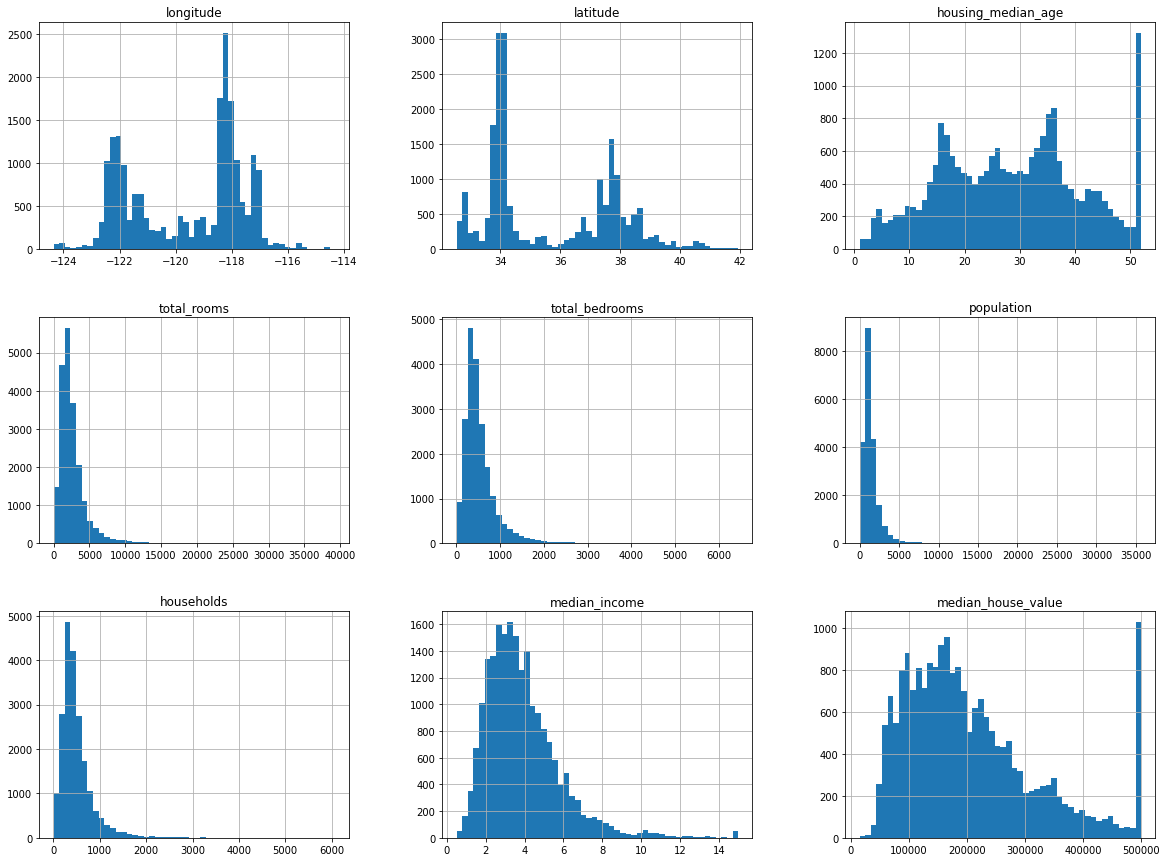

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

housing_data.hist(figsize=(20, 15), bins=50)
plt.show()

In [10]:
# first method to split train test set
import numpy as np

def train_test_split(data, test_ratio):
    np.random.seed(43)
    
    len_data = len(data)
    perm = np.random.permutation(len_data)
    
    return data.iloc[perm[:int(len_data*(1-test_ratio))]], data.iloc[perm[int(len_data*(1-test_ratio)):]]

train_data, test_data = train_test_split(housing_data, 0.2)

print(train_data.shape)
print(test_data.shape)

print(f'first train data \n{train_data.iloc[0]}')
print(f'first test data \n{test_data.iloc[0]}')

(16512, 10)
(4128, 10)
first train data 
longitude               -118.19
latitude                  33.99
housing_median_age           36
total_rooms                1273
total_bedrooms              379
population                 1398
households                  353
median_income            2.4516
median_house_value       147800
ocean_proximity       <1H OCEAN
Name: 7310, dtype: object
first test data 
longitude                -118.17
latitude                   33.79
housing_median_age            30
total_rooms                 1349
total_bedrooms               519
population                  2646
households                   552
median_income             1.9318
median_house_value        115900
ocean_proximity       NEAR OCEAN
Name: 8209, dtype: object


In [11]:
# test method to split train test set
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))&0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_data.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

print(train_set.shape)
print(test_set.shape)

print(f'first train data \n{train_set.iloc[0:10]}')
print(f'first test data \n{test_set.iloc[0:10]}')

(16512, 11)
(4128, 11)
first train data 
    index  longitude  latitude  housing_median_age  total_rooms  \
0       0    -122.23     37.88                41.0        880.0   
1       1    -122.22     37.86                21.0       7099.0   
3       3    -122.25     37.85                52.0       1274.0   
4       4    -122.25     37.85                52.0       1627.0   
6       6    -122.25     37.84                52.0       2535.0   
7       7    -122.25     37.84                52.0       3104.0   
8       8    -122.26     37.84                42.0       2555.0   
9       9    -122.25     37.84                52.0       3549.0   
10     10    -122.26     37.85                52.0       2202.0   
11     11    -122.26     37.85                52.0       3503.0   

    total_bedrooms  population  households  median_income  median_house_value  \
0            129.0       322.0       126.0         8.3252            452600.0   
1           1106.0      2401.0      1138.0         8.3014  

In [12]:
# third method for split train test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing_with_id, 
    test_size = 0.2,
    random_state = 43)

print(train_set.shape)
print(test_set.shape)

print(f'first train data \n{train_set.iloc[0]}')
print(f'first test data \n{test_set.iloc[0]}')

(16512, 11)
(4128, 11)
first train data 
index                       72
longitude              -122.29
latitude                 37.81
housing_median_age          49
total_rooms                844
total_bedrooms             204
population                 560
households                 152
median_income             1.75
median_house_value       75000
ocean_proximity       NEAR BAY
Name: 72, dtype: object
first test data 
index                      7310
longitude               -118.19
latitude                  33.99
housing_median_age           36
total_rooms                1273
total_bedrooms              379
population                 1398
households                  353
median_income            2.4516
median_house_value       147800
ocean_proximity       <1H OCEAN
Name: 7310, dtype: object


In [13]:
housing_data['income_cat'] = pd.cut(
    housing_data['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)

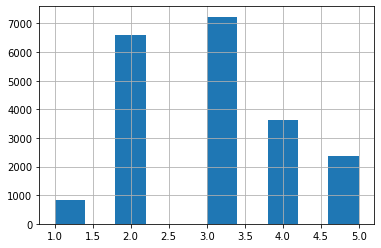

In [14]:
housing_data['income_cat'].hist()
plt.show()

In [15]:
print(housing_data['income_cat'].value_counts()/len(housing_data))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
splitted = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [18]:
for train_index, test_index in splitted.split(housing_data, housing_data['income_cat']):
#     print(train_index)
    stra_train = housing_data.iloc[train_index]
    stra_test = housing_data.iloc[test_index]

In [19]:
# stra distribution
stra_train['income_cat'].value_counts()/len(stra_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [20]:
# orig distribution
housing_data['income_cat'].value_counts()/len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [21]:
train_set, test_set = train_test_split(
    housing_data, 
    test_size = 0.2,
    random_state = 43)

In [22]:
# split with out strat distribution
train_set['income_cat'].value_counts()/len(train_set)

3    0.351381
2    0.319828
4    0.175630
5    0.113372
1    0.039789
Name: income_cat, dtype: float64

## There is no significant the distribution of strat and normal random

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

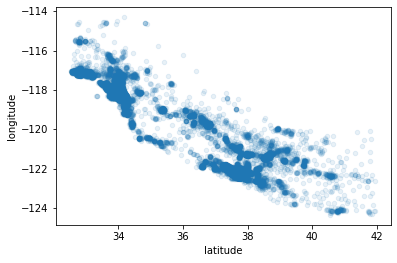

In [23]:
train_set.plot(kind='scatter', x='latitude', y = 'longitude', alpha = 0.1)

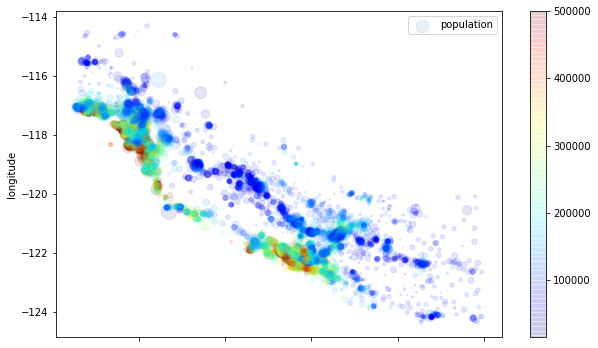

In [24]:
%matplotlib inline
train_set.plot(
    kind = 'scatter', 
    x = 'latitude', 
    y='longitude', 
    s = train_set['population']/50,
    label = 'population',
    alpha = 0.1, 
    cmap=plt.get_cmap("jet"),
    c = train_set['median_house_value'],
    figsize = (10, 6),
    colorbar=True)
plt.legend()

In [25]:
train_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925418,-0.110523,0.044034,0.069503,0.104090,0.057452,-0.015301,-0.043319
latitude,-0.925418,1.000000,0.013790,-0.035624,-0.067868,-0.112972,-0.073163,-0.078997,-0.146099
housing_median_age,-0.110523,0.013790,1.000000,-0.361702,-0.321340,-0.303651,-0.304534,-0.118781,0.104272
total_rooms,0.044034,-0.035624,-0.361702,1.000000,0.929059,0.863172,0.917526,0.200847,0.136422
total_bedrooms,0.069503,-0.067868,-0.321340,0.929059,1.000000,0.887092,0.980707,-0.005755,0.053079
population,0.104090,-0.112972,-0.303651,0.863172,0.887092,1.000000,0.914236,0.006393,-0.024487
households,0.057452,-0.073163,-0.304534,0.917526,0.980707,0.914236,1.000000,0.015438,0.067724
median_income,-0.015301,-0.078997,-0.118781,0.200847,-0.005755,0.006393,0.015438,1.000000,0.685886
median_house_value,-0.043319,-0.146099,0.104272,0.136422,0.053079,-0.024487,0.067724,0.685886,1.000000


## Scatter matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='longitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='m

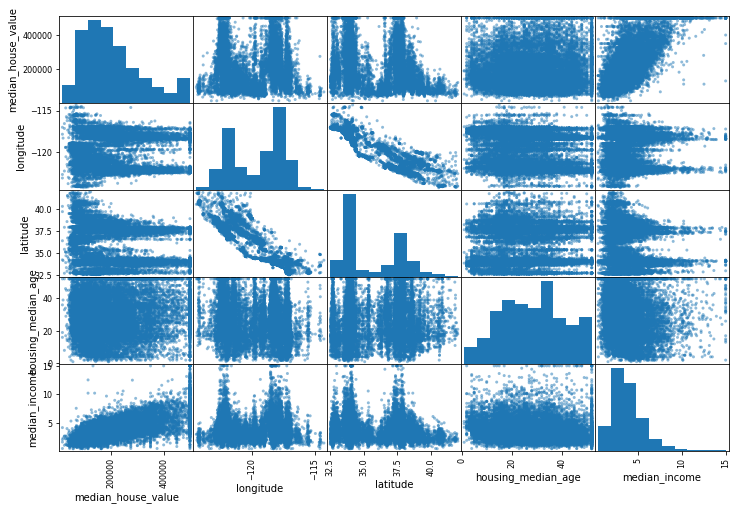

In [26]:
from pandas.plotting import scatter_matrix

focused_attributes = ['median_house_value', 'longitude', 'latitude', 'housing_median_age', 'median_income']
scatter_matrix(train_set[focused_attributes], figsize=(12, 8))

In [27]:
 train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 72 to 14148
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16351 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [28]:
mod_train_set = train_set.copy()
mod_train_set['total_rooms_per_household'] = train_set['total_rooms']/train_set['households']
mod_train_set['total_bedrooms_per_rooms'] = train_set['total_bedrooms']/train_set['total_rooms']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='longitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_bedrooms_per_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms_per_household', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedroo

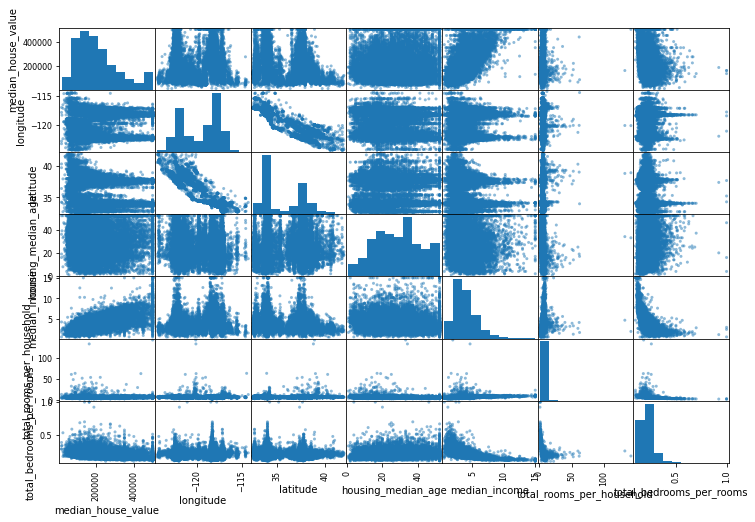

In [29]:
attributes = focused_attributes + ['total_rooms_per_household', 'total_bedrooms_per_rooms']
scatter_matrix(mod_train_set[attributes], figsize=(12, 8))

In [30]:
corr_matrix = mod_train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.685886
total_rooms_per_household    0.147782
total_rooms                  0.136422
housing_median_age           0.104272
households                   0.067724
total_bedrooms               0.053079
population                  -0.024487
longitude                   -0.043319
latitude                    -0.146099
total_bedrooms_per_rooms    -0.256558
Name: median_house_value, dtype: float64

In [31]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_household,total_bedrooms_per_rooms
longitude,1.000000,-0.925418,-0.110523,0.044034,0.069503,0.104090,0.057452,-0.015301,-0.043319,-0.031536,0.093991
latitude,-0.925418,1.000000,0.013790,-0.035624,-0.067868,-0.112972,-0.073163,-0.078997,-0.146099,0.109790,-0.117097
housing_median_age,-0.110523,0.013790,1.000000,-0.361702,-0.321340,-0.303651,-0.304534,-0.118781,0.104272,-0.146149,0.134265
total_rooms,0.044034,-0.035624,-0.361702,1.000000,0.929059,0.863172,0.917526,0.200847,0.136422,0.130435,-0.188953
total_bedrooms,0.069503,-0.067868,-0.321340,0.929059,1.000000,0.887092,0.980707,-0.005755,0.053079,0.000294,0.086720
population,0.104090,-0.112972,-0.303651,0.863172,0.887092,1.000000,0.914236,0.006393,-0.024487,-0.074316,0.043727
households,0.057452,-0.073163,-0.304534,0.917526,0.980707,0.914236,1.000000,0.015438,0.067724,-0.080433,0.069014
median_income,-0.015301,-0.078997,-0.118781,0.200847,-0.005755,0.006393,0.015438,1.000000,0.685886,0.311603,-0.618006
median_house_value,-0.043319,-0.146099,0.104272,0.136422,0.053079,-0.024487,0.067724,0.685886,1.000000,0.147782,-0.256558
total_rooms_per_household,-0.031536,0.109790,-0.146149,0.130435,0.000294,-0.074316,-0.080433,0.311603,0.147782,1.000000,-0.404449


## finish data visualization, it's time to begin data cleaning!

In [32]:
housing = housing_data.drop(columns=['median_house_value'])
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  object  
 9   income_cat          20640 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.4+ MB


In [33]:
housing_label = housing_data[['median_house_value']]

In [34]:
housing_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [35]:
print(housing_label is housing_data[['median_house_value']])

False


In [36]:
## data cleaning function
housing.loc[housing['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY,2
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,NEAR BAY,2
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY,4
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,NEAR OCEAN,3
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,NEAR OCEAN,2
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,<1H OCEAN,5


In [37]:
## simple class imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [38]:
housing_label = train_set['median_house_value']
housing = train_set.drop(columns=['median_house_value'])
housing_num = train_set.drop(columns=['ocean_proximity', 'median_house_value'])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
X = imputer.fit_transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)#, index = housing_num.index)

In [41]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [42]:
## encode categorical feature using ordinal and one hot encoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [43]:
housing_cat = train_set[['ocean_proximity']]

In [44]:
ord_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder()

In [45]:
ord_encoder.fit(housing_cat)
oh_encoder.fit(housing_cat)
housing_ord = ord_encoder.transform(housing_cat)
housing_oh = oh_encoder.transform(housing_cat)

In [46]:
print(housing_oh.shape)
print(housing_ord.shape)

(16512, 5)
(16512, 1)


## Create custom transformer using sklearn.base

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

In [48]:
tot_bedrooms_idx = 4
tot_rooms_idx = 3

class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self # do no thing
    
    def transform(self, X):
        
        bedrooms_per_room = X[:, tot_bedrooms_idx]/X[:, tot_rooms_idx]
        X_numpy = np.c_[X, bedrooms_per_room]
        
        return X_numpy

In [49]:
my_transformer = MyTransformer()

X = my_transformer.fit_transform(housing_num.to_numpy())

In [50]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


## Introduction to Pipeline and ColumnTransformer

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [52]:
# normally, the category feature and number feature have to be dealt with seperately
# but for the sklearn after version 0.2, the columntransformer is introduced and can deal with this problem

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_combine', MyTransformer()),
    ('standardization', MinMaxScaler())
])

num_pipeline.fit(housing_num)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('feature_combine', MyTransformer()),
                ('standardization', MinMaxScaler())])

In [53]:
sample = num_pipeline.transform(housing_num)

In [54]:
for i in range(sample.shape[1]):
    print(f'mean : {sample[:, i].mean()} std : {sample[:, i].std()}')

mean : 0.4749232840923123 std : 0.19948254110801358
mean : 0.32969433494797723 std : 0.22685695867263475
mean : 0.5417711658306734 std : 0.2470117157671705
mean : 0.06701135877121589 std : 0.05506736444294205
mean : 0.08626497192919365 std : 0.06689238387901293
mean : 0.08720115060398537 std : 0.0670993616608621
mean : 0.09300848845169658 std : 0.07062909839495113
mean : 0.23196593848438232 std : 0.13014405324487882
mean : 0.5007418846899225 std : 0.2631651562455752
mean : 0.09602038281977525 std : 0.03505057847451699


In [55]:
## using ColumnTransformer to both transform num and cat value
num_col_names = housing_num.columns
cat_col_names = housing_cat.columns

print(num_col_names)
print(cat_col_names)

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_col_names),
    ('cat_pipeline', OneHotEncoder(), cat_col_names)
])

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 72 to 14148
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16351 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [57]:
full_pipeline.fit(housing)

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_combine',
                                                  MyTransformer()),
                                                 ('standardization',
                                                  MinMaxScaler())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'],
      dtype='object')),
                                ('cat_pipeline', OneHotEncoder(),
                                 Index(['ocean_proximity'], dtype='object'))])

In [58]:
X = full_pipeline.transform(housing)
print(X.shape)

(16512, 15)


## It's time to implement ml model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [60]:
# forecast using linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, housing_label)

LinearRegression()

In [61]:
print(f'mse : {np.sqrt(mean_squared_error(housing_label, lin_reg.predict(X)))}')
print(f'mae : {mean_absolute_error(housing_label, lin_reg.predict(X))}')

mse : 67954.9007604922
mae : 49434.08650184498


In [62]:
# using decision tree
tree = DecisionTreeRegressor()
tree.fit(X, housing_label)

DecisionTreeRegressor()

In [63]:
print(f'mse : {np.sqrt(mean_squared_error(housing_label, tree.predict(X)))}')
print(f'mae : {mean_absolute_error(housing_label, tree.predict(X))}')

mse : 0.0
mae : 0.0


In [64]:
# implement cross validation to obeserve the overfitting
def cv_scores(model, X, y, cv, scoring, save = True, 
              save_loc = './saved_model/house-pricing-analysis', 
              model_name = 'mymodel'):
    import joblib
    import os
    
    history = cross_val_score(model, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error')

    os.makedirs(save_loc, exist_ok = True)
    # save model
    joblib.dump(model, save_loc + '/' + model_name)
    # save history
    joblib.dump(history, save_loc + '/' + model_name + '_results')
    
    print(f'all scores : {np.sqrt(-history)}')
    print(f'mean : {np.sqrt(-history).mean()}')
    print(f'std : {np.sqrt(-history).std()}')

In [65]:
save_loc = './saved_model/house-pricing-analysis'
model_name = 'decision-tree'
cv_scores(tree, X, y=housing_label, cv = 10, 
          scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

all scores : [66804.66814617 69044.12611693 68080.88095132 72277.90871345
 70183.42235105 75502.92828071 73591.22144863 69387.70853845
 69897.44752136 69370.38928146]
mean : 70414.07013495264
std : 2495.510933974911


In [66]:
model_name = 'linear-regression'
cv_scores(lin_reg, X, y=housing_label, cv = 10, 
          scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

all scores : [65601.68839646 66785.98983141 69769.28179171 69171.23771226
 67457.31604046 67809.99232016 69031.75206804 66870.03094586
 66856.04161116 71710.02805004]
mean : 68106.33587675574
std : 1713.4673036390318


In [188]:
svr = SVR(kernel='linear')
cv_scores(svr, X, y=housing_label, cv = 10, 
          scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

all scores : [116072.25899224 119425.34260204 119015.05746594 114762.99409944
 116999.81253011 116163.91713171 116506.09937094 115163.27859666
 117950.04172866 120028.58639597]
mean : 117208.73889137068
std : 1725.205948399547


In [246]:
# load model test
import joblib
import os

model = joblib.load(os.path.join(save_loc, 'linear-regression'))
history = joblib.load(os.path.join(save_loc, 'linear-regression_results'))

# random forest
forest = RandomForestRegressor()

model_name = 'random-forest'
cv_scores(forest, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name

svr = SVR()

model_name = 'support-vector-regressor'
cv_scores(svr, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

mlp = MLPRegressor(hidden_layer_sizes=[5,5], solver = 'lbfgs')

model_name = 'neural-network'
cv_scores(mlp, X, y=housing_label, cv = 10, scoring='neg_mean_squared_error', 
          save_loc = save_loc, 
          model_name = model_name)

## Fine tune the model using grid search and randomized search

In [155]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

In [156]:
# distributions = {
#     'splitter': ['best', 'random'],
#     'max_depth':randint(2, 50),
#     'max_leaf_nodes': [None, randint(2,50)]
# }

# rcv = RandomizedSearchCV(DecisionTreeRegressor(), distributions, cv = 5, n_iter = 50, random_state=8)

In [94]:
grid_params = {'splitter':['best', 'random'], 
               'max_depth' : [5, 10, 15], 
               'max_features' : [None, 'log2'], 
               'max_leaf_nodes':[None, 5, 10]}

gcv = GridSearchCV(DecisionTreeRegressor(), grid_params, cv = 5, scoring='neg_mean_squared_error')

In [95]:
gcv.fit(X, housing_label)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [None, 'log2'],
                         'max_leaf_nodes': [None, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [96]:
np.sqrt(-gcv.best_score_)

63985.55253673904

In [97]:
for mean_score, param in zip(gcv.cv_results_['mean_test_score'], gcv.cv_results_['params']):
    print(f'{np.sqrt(-mean_score)} {param}')

70865.82610324565 {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}
73865.37485594422 {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'random'}
79249.74553078672 {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 5, 'splitter': 'best'}
80952.0184110334 {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 5, 'splitter': 'random'}
73986.9146639703 {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'splitter': 'best'}
76953.21337072567 {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'splitter': 'random'}
79472.58754329407 {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'splitter': 'best'}
93241.97452775015 {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'splitter': 'random'}
87626.60495142042 {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 5, 'splitter': 'best'}
88382.47501562265 {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 5, 'splitter': 

## Observe feature importances

In [132]:
gcv.best_estimator_.feature_importances_.shape
feature_importances = gcv.best_estimator_.feature_importances_

In [131]:
print(num_col_names)
extra_col_names = ['num_bedrooms_per_room']
print(cat_col_names)
full_cat_col_names = full_pipeline.named_transformers_['cat_pipeline'].categories_

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


In [145]:
print(list(full_cat_col_names[0]))

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [207]:
all_features = list(num_col_names)+extra_col_names+list(full_cat_col_names[0])

feature_w_importances = zip(feature_importances, all_features)
feature_w_importances = list(sorted(feature_w_importances, reverse = True))
print(feature_w_importances)

[(0.5512878764816169, 'median_income'), (0.17524840813722967, 'INLAND'), (0.08914269892291424, 'longitude'), (0.07710719576151771, 'latitude'), (0.04343415871723004, 'housing_median_age'), (0.020932398982117423, 'num_bedrooms_per_room'), (0.011103568585741417, 'NEAR OCEAN'), (0.0101459803626767, 'population'), (0.00781953762727685, 'total_bedrooms'), (0.007494474035711495, 'households'), (0.005364487076549966, 'total_rooms'), (0.000918641341256308, '<1H OCEAN'), (5.739681612317558e-07, 'income_cat'), (0.0, 'NEAR BAY'), (0.0, 'ISLAND')]


## evaluate system on the test set

In [158]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 7310 to 19539
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4082 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [160]:
test_label = test_set['median_house_value']
test_data = test_set.drop(columns=['median_house_value'])

In [162]:
X_test = full_pipeline.transform(test_data)

In [166]:
print(f' mae : {mean_absolute_error(test_label, gcv.best_estimator_.predict(X_test))}')
print(f' mae : {np.sqrt(mean_squared_error(test_label, gcv.best_estimator_.predict(X_test)))}')

 mae : 41347.02068177062
 mae : 63141.14113318004


## find the confidence interval of test score using t-distributions vs normal-distribution

In [167]:
import scipy.stats

In [171]:
print(rse.shape)

(4128,)


In [187]:
confidence = 0.95
rse = np.power(test_label - gcv.best_estimator_.predict(X_test),2)
mean = rse.mean()
std = rse.std()
sem = scipy.stats.sem(rse)
print(f'{mean: ,.2f}')
print(f'{std:,.2f}')
print(f'{sem:,.2f}')

t_interval = np.sqrt(scipy.stats.t.interval(confidence, len(rse) - 1, mean, sem))
print(t_interval)

 3,986,803,703.60
11,677,330,549.13
181,749,711.27
[60253.43402907 65902.43618338]


## integrate feature selection on data pipeline

In [215]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelectionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
    
    def fit(self, X, y = None):
        return self # do no thing
    
    def transform(self, X, y = None):
        new_X = X[:, self.selected_features]
        return new_X

In [216]:
num_selected = 5
selected_feature_idx = []

print(feature_w_importances[0][1])
print(all_features.index('median_income'))

for i in range(num_selected):
    feature = feature_w_importances[i][1]
    selected_feature_idx.append(all_features.index(feature))
    
print(selected_feature_idx)

median_income
7
[7, 11, 0, 1, 2]


In [217]:
feature_selector = FeatureSelectionTransformer(selected_feature_idx)
new_X = feature_selector.fit_transform(X)

In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_combine', MyTransformer()),
    ('scaler', MinMaxScaler())
])

composed_pipe = ColumnTransformer([
    ('num_pipe', num_pipeline, num_col_names),
    ('cat_pipe', OneHotEncoder(), cat_col_names)
])

full_pipe = Pipeline([
    ('composed_pipe', composed_pipe),
    ('feature_selector', feature_selector)
])

In [225]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 72 to 14148
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16351 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [231]:
X_prep = full_pipe.fit_transform(housing)

In [232]:
print(X_prep.shape)

(16512, 5)


## Fine tune model again and compare with the old model

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [237]:
lin_reg = LinearRegression()
tree = DecisionTreeRegressor()

In [243]:
history_lin = cross_val_score(lin_reg, X_prep, housing_label, cv = 10, scoring = 'neg_mean_squared_error')
history_tree = cross_val_score(tree, X_prep, housing_label, cv = 10, scoring = 'neg_mean_squared_error')

In [246]:
print(f'mean linear model : {np.sqrt(-history_lin).mean()}')
print(f'mean decision tree : {np.sqrt(-history_tree).mean()}')

mean linear model : 72579.02970545672
mean decision tree : 67120.22360190211


## perform grid search again to finetune decision tree model

In [247]:
from sklearn.model_selection import GridSearchCV

In [258]:
tree_params = {'max_depth':[1, 10, 15, 20], 'max_features': [None,1,3,5], 'max_leaf_nodes':[None, 3, 5, 7]}

gcv_tree = GridSearchCV(DecisionTreeRegressor(), tree_params, cv = 10, scoring='neg_mean_squared_error')

In [259]:
gcv_tree.fit(X_prep, housing_label)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 10, 15, 20],
                         'max_features': [None, 1, 3, 5],
                         'max_leaf_nodes': [None, 3, 5, 7]},
             scoring='neg_mean_squared_error')

In [263]:
gcv_tree.cv_results_['params']

[{'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None},
 {'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 3},
 {'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 5},
 {'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 7},
 {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': None},
 {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 3},
 {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 5},
 {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 7},
 {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': None},
 {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': 3},
 {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': 5},
 {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': 7},
 {'max_depth': 1, 'max_features': 5, 'max_leaf_nodes': None},
 {'max_depth': 1, 'max_features': 5, 'max_leaf_nodes': 3},
 {'max_depth': 1, 'max_features': 5, 'max_leaf_nodes': 5},
 {'max_depth': 1, 'max_features': 5, 'max_leaf_nodes': 7},
 {'max_depth': 10, 'max_features

In [264]:
for rmse, estimator in zip(np.sqrt(-gcv_tree.cv_results_['mean_test_score']), gcv_tree.cv_results_['params']):
    print((rmse, estimator))

(95996.3135413862, {'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None})
(95996.3135413862, {'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 3})
(95996.3135413862, {'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 5})
(95996.3135413862, {'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 7})
(106023.48855298146, {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': None})
(101538.3238126571, {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 3})
(107587.01354700261, {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 5})
(105264.91054812376, {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 7})
(97448.06004327332, {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': None})
(97382.81120350557, {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': 3})
(99483.1532957887, {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': 5})
(98504.19896867943, {'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': 7})
(95996.3135413862, {'max_depth': 1, 'max_feat

In [267]:
print(gcv_tree.best_estimator_)
print(np.sqrt(-gcv_tree.best_score_))

DecisionTreeRegressor(max_depth=10, max_features=5)
60417.9757441577


## Integrate preprocessing pipe line with gridsearch cv!

In [269]:
full_function_pipe = Pipeline([
    ('preprocess_pipe', full_pipe),
    ('estimator', gcv_tree)
])

In [271]:
full_function_pipe.fit(housing, housing_label)

Pipeline(steps=[('preprocess_pipe',
                 Pipeline(steps=[('composed_pipe',
                                  ColumnTransformer(transformers=[('num_pipe',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('feature_combine',
                                                                                    MyTransformer()),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'medi...
                    

In [276]:
full_function_pipe.named_steps['estimator'].best_estimator_.predict(X_prep[:5])

array([132209.18348624,  77768.72916667,  79593.10344828, 326383.33333333,
        79505.77777778])

In [278]:
full_function_pipe.predict(housing[:5])

array([132209.18348624,  77768.72916667,  79593.10344828, 326383.33333333,
        79505.77777778])

In [288]:
rmse = np.sqrt(-full_function_pipe.named_steps['estimator'].best_score_)

print(f'rmse : {rmse}')

rmse : 60394.012458076104


In [293]:
## test on test set
pred = full_function_pipe.predict(test_data)

rmse = np.sqrt(mean_squared_error(test_label, pred))
print(f'test rmse : {rmse:,.2f}')

test rmse : 59,858.48


In [294]:
# find the confidence interval using t distribution
import scipy.stats

In [302]:
degree = len(pred) - 1
confidence = 0.99
se = np.power(test_label - pred, 2)
mse = se.mean()
sem = scipy.stats.sem(se)

In [303]:
print(np.sqrt(scipy.stats.t.interval(confidence, degree, mse, sem)))

[56383.87523565 63142.16909748]
